# Diabetes Risk Assessment and Prediction

## Project Overview

For this project I sought to develop a predictive model to identify individuals who are at higher risk of developing diabetes based on an array of health-related characteristics. Using this data and predictive models, health-care practitioners can improve patient outcomes by improving early diagnosis/ detection and preemptively implementing personalized strategies for both treament and prevention of diabetes.


## Business Problem and Stakeholder

A healthcare practice group is looking to improve diabetes diagnosis, improve prognosis of those who are diagnosed and assist patients looking to prevent diabetes. Utilizing this data, providers will be able to look for early detection signs of diabetes and then implement corrective strategies early on in the diesease process to either improve the patients outcome and health with the disease or prevent it altogether. Utilizing the model, the goal is to assist practitioners with early detection by building a predictive model that can identify individuals who have diabetes based health-related attributes such as blood pressure, glucose levels, insulin levels, BMI, age and other factors. 

## Data Understanding

For this project, I will be looking at a dataset which is derived from a 2016 research study out of China which contains information regarding various health factors and diabetic status of the reserach population. The dataset was collected in accordance with health indicators and health standards from the World Health Organization. 

In [2]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importing packages for statistics and modeling
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import kstest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve , log_loss, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, log_loss, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Loading Dataset
diabetes = pd.read_csv('data/diabetes_2.csv')

# Previewing general information on dataset
print(diabetes.info())

#Previewing first 5 rows 
diabetes.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


Initially we have 4303 entries (rows) with 18 columns representing the feature variables and target variable. The data types of the columns are either integers or floats indicating that all columns are numeric in nature. Even with all columns being numeric, there are columns such as smoking, drinking, family_histroy, gender and Diabetes which are categorical variables. Looking further into our dataset, the column Diabetes is a binary classification variable. This is the target variable in which a value of 0 represents absence of diabetes and a value of 1 represents presence of diabetes.

In [6]:
# Dropping any duplicate rows 
diabetes = diabetes.drop_duplicates()

# Checking for missing values
diabetes.isna().sum()

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

In [8]:
#Getting value_counts for whole dataset
for col in diabetes:
        print (diabetes[col].value_counts())

Age
34    169
35    137
33    137
37    128
29    121
     ... 
23      2
22      2
90      2
91      2
93      1
Name: count, Length: 70, dtype: int64
Gender
1    2790
2    1513
Name: count, dtype: int64
BMI
23.50    62
23.40    59
26.00    59
24.80    56
23.80    55
         ..
20.57     1
32.60     1
28.34     1
20.69     1
34.30     1
Name: count, Length: 275, dtype: int64
SBP
122    107
111    106
123    104
125    103
110    103
      ... 
85       1
200      1
72       1
77       1
191      1
Name: count, Length: 111, dtype: int64
DBP
72     191
77     190
73     156
76     153
74     147
      ... 
45       1
49       1
48       1
126      1
111      1
Name: count, Length: 75, dtype: int64
FPG
5.10    97
5.00    93
4.90    77
5.20    71
5.30    71
        ..
3.63     1
3.49     1
3.57     1
3.42     1
3.03     1
Name: count, Length: 361, dtype: int64
Chol
4.00    70
4.50    49
5.00    47
4.60    41
4.20    40
        ..
6.74     1
7.58     1
7.96     1
2.81     1
8.82     1
Nam

When looking over the values, units for glucose measurements(FPG, FFPG) and lipid measurements (Chol, Tri, HDL, LDL) appear to be presented in metric units (mmol). While initially there seems to be no null/missing values, upon review of value counts there is an abnormal value, 4.860753, that seems to be common in most columns. This may be a placeholder for missing values. This will need to be addressed.

Regarding the target variable of the Diabetes column, there are 3000 entries showing no diabetes diagnosis while 1303 indicate a diabetes diagnosis.


## Data Preparation/ Preprocessing

Since it was discovered that multiple columns seem to have the same placeholder value of 4.860753, the dataset will be filtered to remove any rows that contain that value as we can assume this maybe a placeholder for missing values. 

In [13]:
# Create a new DataFrame to store the filtered data
filtered_diabetes = diabetes.copy()

# Value to drop
value_to_drop = 4.860753

# Loop through the columns and drop rows containing the value
for col in diabetes.columns:
    filtered_diabetes = filtered_diabetes[filtered_diabetes[col] != value_to_drop]

# Reset the index of the filtered DataFrame
filtered_diabetes.reset_index(drop=True, inplace=True)

# Renaming columns for fluid formatting
filtered_diabetes.rename(columns={'family_histroy': 'Family_History', 'smoking': 'Smoking', 
                                  'drinking': 'Drinking'}, inplace=True)


# Print the filtered DataFrame
print(filtered_diabetes)


      Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0      26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1      40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2      40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3      43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4      36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   
...   ...     ...   ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
3255   77       1  22.9  134   73  5.52  4.02  1.28  1.23  2.25  42.2  4.34   
3256   54       1  23.4  126   75  6.82  5.00  1.50  1.24  2.98   8.0  3.50   
3257   67       1  24.6  138   81  4.85  3.89  1.38  1.14  2.17  18.1  4.73   
3258   60       2  29.0  101   60  6.70  5.91  1.29  1.73  2.85  18.9  7.33   
3259   37       1  34.3  120   71  4.97  5.42  2.66  1.08  2.87  81.0  4.61   

       CCR  FFPG  Smoking  Drinking  Family_History

In [15]:
# Creating new df from filtered dataset
diabetes_df = filtered_diabetes.copy()
diabetes_df.info()

# Getting number of patients with and without diabetes
print(diabetes_df['Diabetes'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3260 non-null   int64  
 1   Gender          3260 non-null   int64  
 2   BMI             3260 non-null   float64
 3   SBP             3260 non-null   int64  
 4   DBP             3260 non-null   int64  
 5   FPG             3260 non-null   float64
 6   Chol            3260 non-null   float64
 7   Tri             3260 non-null   float64
 8   HDL             3260 non-null   float64
 9   LDL             3260 non-null   float64
 10  ALT             3260 non-null   float64
 11  BUN             3260 non-null   float64
 12  CCR             3260 non-null   float64
 13  FFPG            3260 non-null   float64
 14  Smoking         3260 non-null   float64
 15  Drinking        3260 non-null   float64
 16  Family_History  3260 non-null   int64  
 17  Diabetes        3260 non-null   i

After cleaning and preparation the cleaned dataset now contains 3260 rows with 18 columns containing numerical data types. Our target variable is the presence of diabetes which is indicated by the Diabetes column. Our independent, or feature, variables contain various health and lifestyle indicators ranging from numerical columns containing lab values of various health markers to categorical columns, such as smoking, drinking, and gender.

## Data Analysis/ Data Visualization

In [19]:
# Creating separate dfs
# One df with variables named for comprehension 
# second df just as a baseline copy
diabetes_df_main = diabetes_df.copy()

# Renaming columns for varaible understanding 
diabetes_df.rename(columns={'FFPG': 'Final Fasting Plasma Glucose', 'FPG': 'Fasting Plasma Glucose', 
                                  'SBP': 'Systolic Blood Pressure', 'Tri': 'Triglycerides', 
                                  'DBP': 'Diastolic Blood Pressure', 'Chol': 'Cholesterol', 
                                  'CCR': 'Creatine Clearance'}, inplace=True)

Diabetes                        1.000000
Final Fasting Plasma Glucose    0.525417
Fasting Plasma Glucose          0.362254
Age                             0.337337
Systolic Blood Pressure         0.190874
BMI                             0.157559
Triglycerides                   0.115426
Diastolic Blood Pressure        0.113250
BUN                             0.103984
Cholesterol                     0.098017
Family_History                  0.074080
LDL                             0.072715
ALT                             0.068399
Drinking                        0.029131
Creatine Clearance              0.016781
Gender                         -0.067812
HDL                            -0.083152
Smoking                        -0.101890
Name: Diabetes, dtype: float64


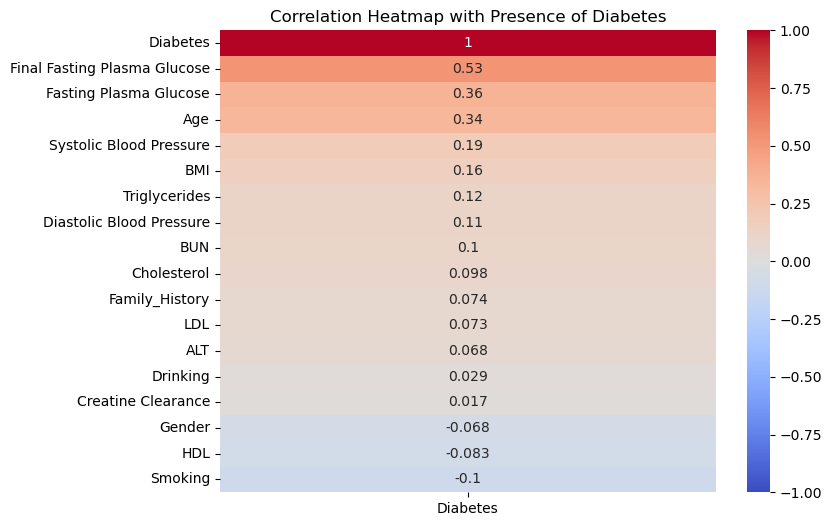

In [21]:
# Checking correlations between feature variables and target variables
print(diabetes_df.corr()["Diabetes"].sort_values(ascending = False))

# Heatmap showing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_df.corr()[['Diabetes']].sort_values(by='Diabetes', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of Diabetes')
plt.show()

Looking at the correlations of the current variables we see that the top 3 highest correlates are:

- FFPG (Final Fasting Plasma Glucose): highest correlation at 0.53
- FPG (Fasting Plasma Glucose): 2nd highest correlation at 0.36
- Age: 3rd highest correlation at 0.34

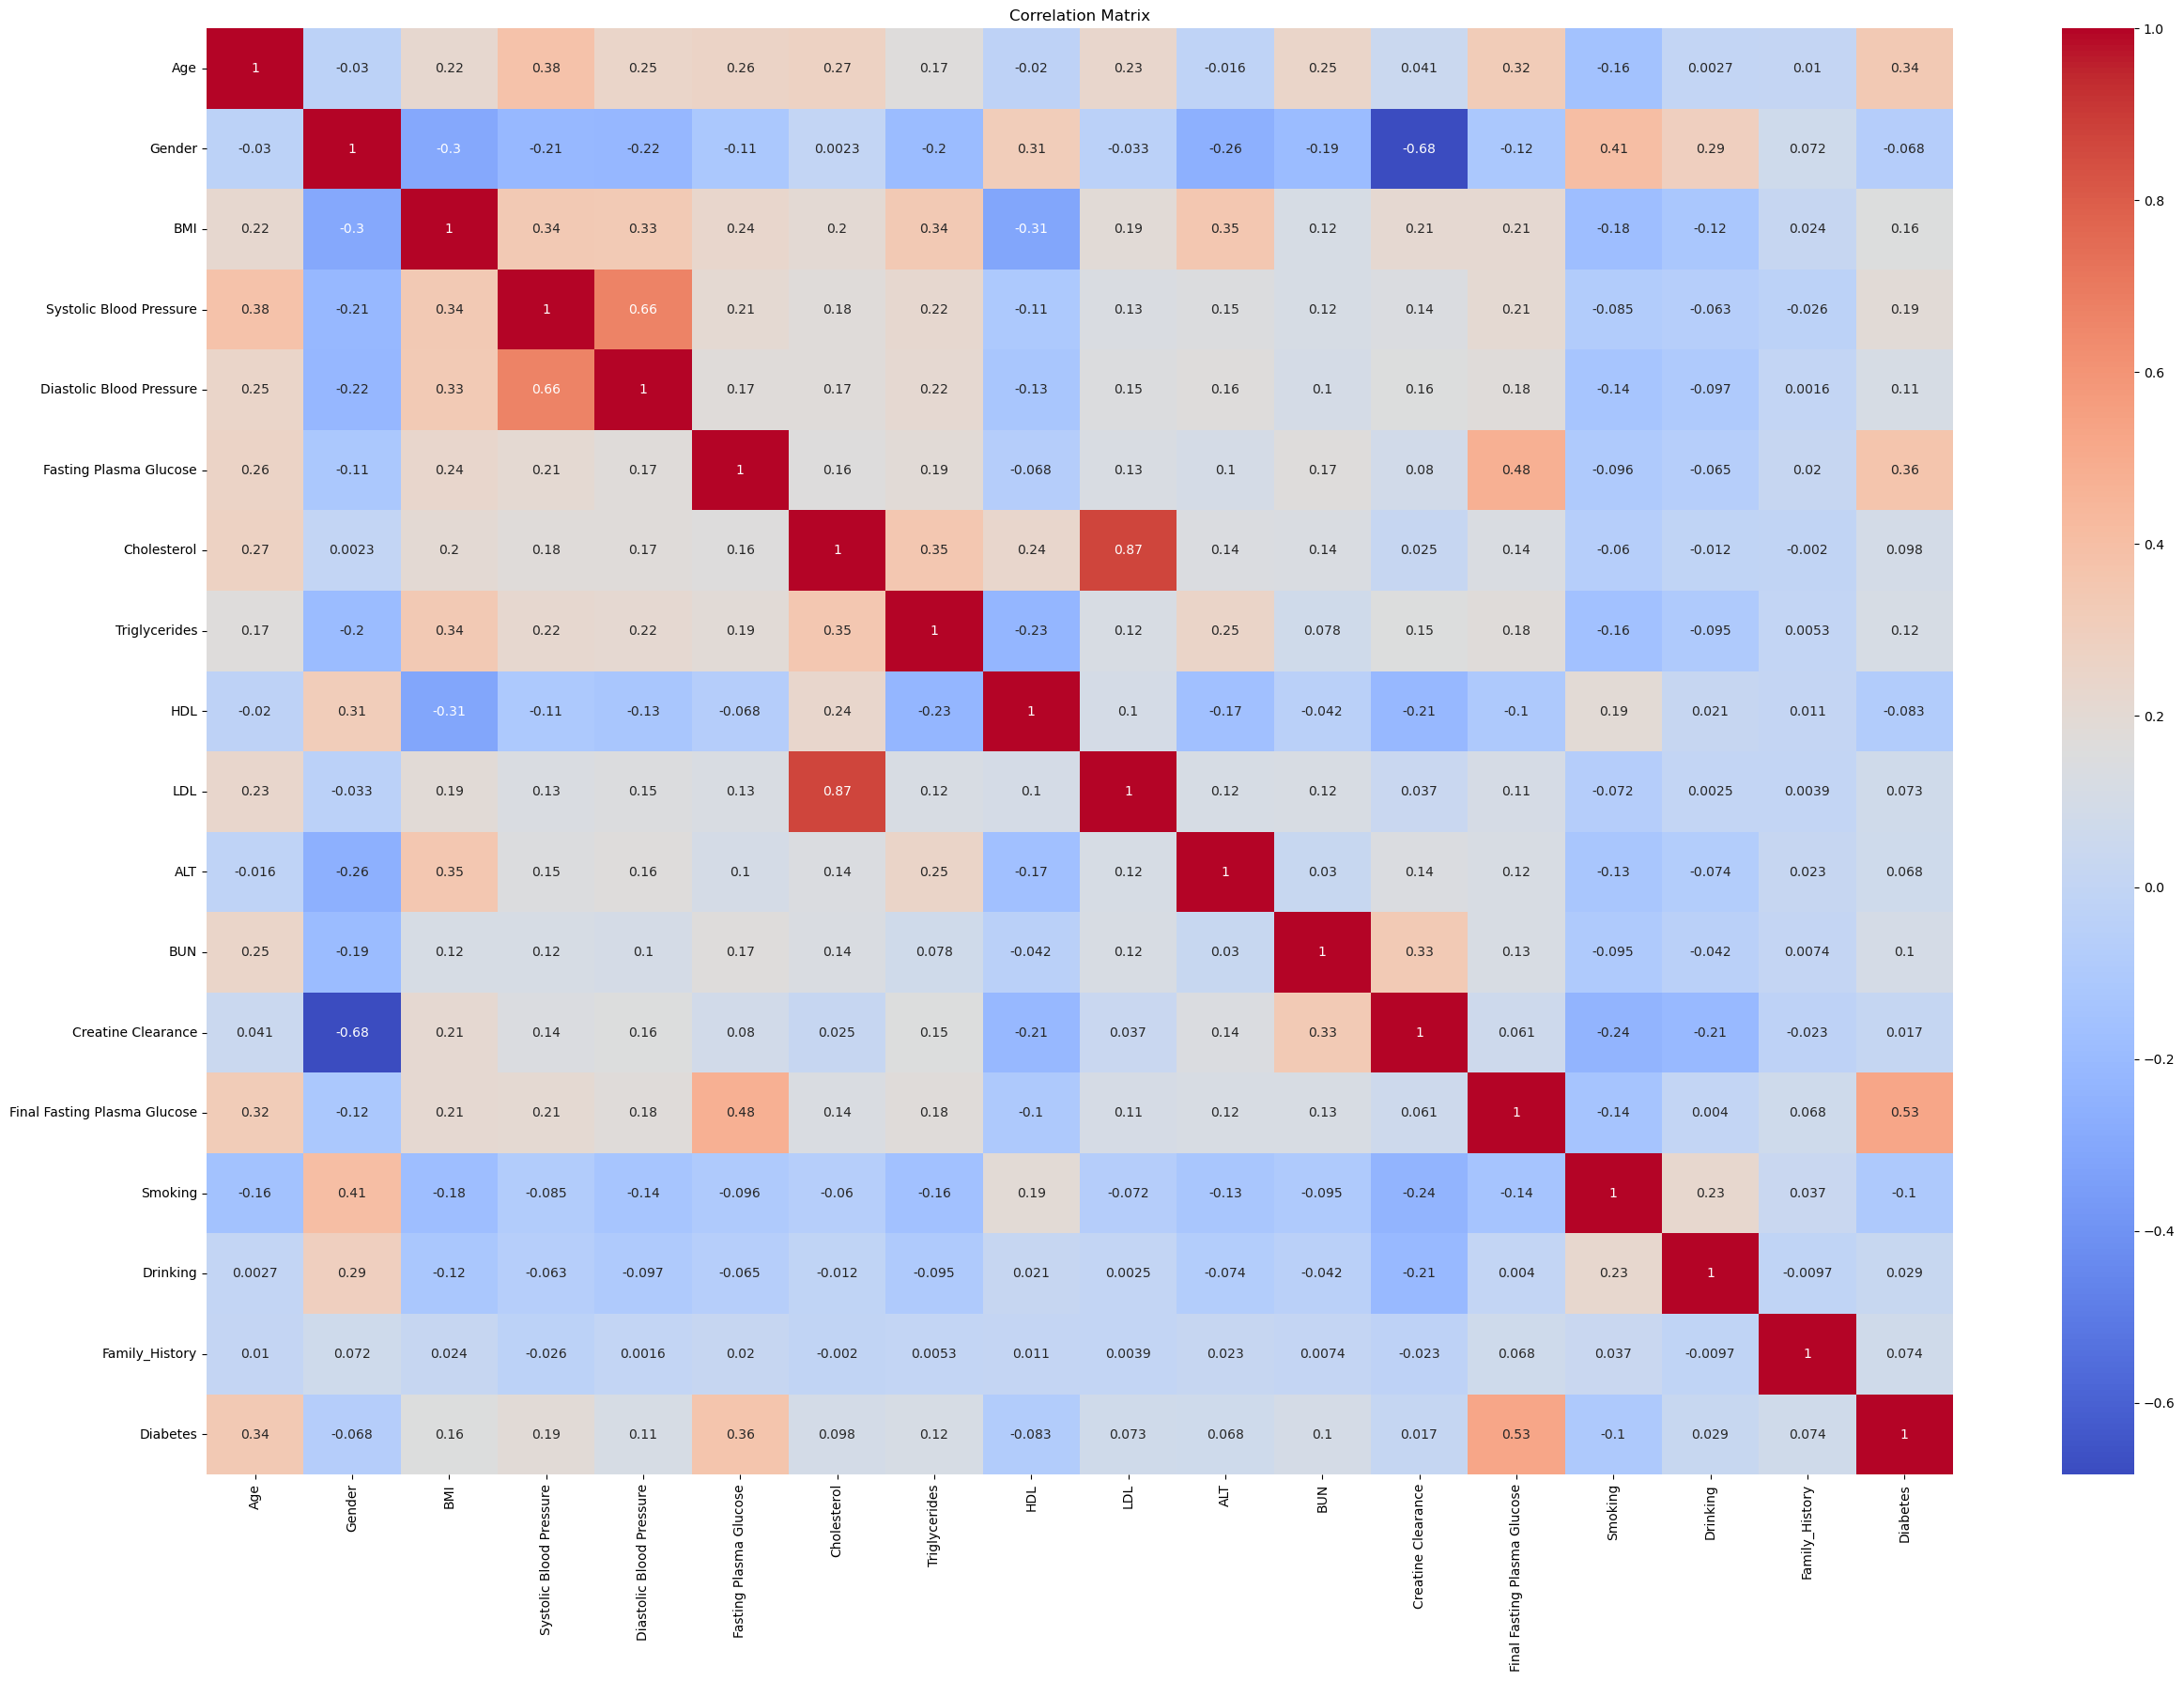

In [24]:
#Generating Correlation matrix
corr_matrix = diabetes_df.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Upon looking at the correlation matrix, two relationships standout which include:

- CHOL and LDL: 0.87
- SBP and DBP: 0.66

I will leave these variables in for the current time being for the baseline model.

In [27]:
# Getting descriptive statistics on dataset 
diabetes_df.describe()

,Age,Gender,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Fasting Plasma Glucose,Cholesterol,Triglycerides,HDL,LDL,ALT,BUN,Creatine Clearance,Final Fasting Plasma Glucose,Smoking,Drinking,Family_History,Diabetes
count,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000
mean,44.375767,1.339877,23.748322,120.870859,75.479448,5.032417,4.811337,1.489951,1.336433,2.763920,26.321748,4.755699,72.383985,5.323294,2.530982,2.776380,0.062270,0.079755
std,13.459344,0.473740,3.321371,16.224157,10.542970,0.668683,0.914609,1.233862,0.314090,0.690399,22.658506,1.213527,15.350584,0.915552,0.823085,0.471977,0.241682,0.270954
min,22.000000,1.000000,15.600000,72.000000,47.000000,2.840000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,35.600000,3.570000,1.000000,1.000000,0.000000,0.000000
25%,34.000000,1.000000,21.300000,109.000000,68.000000,4.610000,4.160000,0.800000,1.110000,2.290000,14.000000,3.890000,60.700000,4.827500,2.000000,3.000000,0.000000,0.000000
50%,41.000000,1.000000,23.500000,120.000000,75.000000,5.000000,4.740000,1.200000,1.300000,2.700000,20.000000,4.630000,73.000000,5.160000,3.000000,3.000000,0.000000,0.000000
75%,53.000000,2.000000,25.900000,131.000000,82.000000,5.400000,5.380000,1.820000,1.530000,3.182500,30.600000,5.490000,82.900000,5.510000,3.000000,3.000000,0.000000,0.000000
max,93.000000,2.000000,37.000000,189.000000,134.000000,6.990000,11.650000,32.640000,3.870000,6.270000,436.200000,14.640000,214.400000,20.600000,3.000000,3.000000,1.000000,1.000000


In [29]:
# Getting descriptive statistics for population with Diabetes
print(diabetes_df[diabetes_df['Diabetes'] > 0].describe())

# Getting descriptive statistics for population without Diabetes 
print(diabetes_df[diabetes_df['Diabetes'] == 0].describe())

              Age      Gender         BMI  Systolic Blood Pressure  \
count  260.000000  260.000000  260.000000               260.000000   
mean    59.796154    1.230769   25.525654               131.388462   
std     12.495280    0.422138    3.233779                20.015415   
min     29.000000    1.000000   16.500000                89.000000   
25%     52.000000    1.000000   23.300000               117.000000   
50%     60.000000    1.000000   25.250000               130.000000   
75%     68.000000    1.000000   27.600000               144.000000   
max     88.000000    2.000000   37.000000               189.000000   

       Diastolic Blood Pressure  Fasting Plasma Glucose  Cholesterol  \
count                260.000000              260.000000   260.000000   
mean                  79.534615                5.855115     5.115808   
std                   11.631187                0.788136     0.918990   
min                   55.000000                3.030000     2.960000   
25%      

In [31]:
# Generating mean values per feature for both diabetic group and non-diabetic group
print(diabetes_df[diabetes_df['Diabetes'] > 0].mean())
print(diabetes_df[diabetes_df['Diabetes'] == 0].mean())

Age                              59.796154
Gender                            1.230769
BMI                              25.525654
Systolic Blood Pressure         131.388462
Diastolic Blood Pressure         79.534615
Fasting Plasma Glucose            5.855115
Cholesterol                       5.115808
Triglycerides                     1.973654
HDL                               1.247731
LDL                               2.934423
ALT                              31.585385
BUN                               5.184269
Creatine Clearance               73.258846
Final Fasting Plasma Glucose      6.957077
Smoking                           2.246154
Drinking                          2.823077
Family_History                    0.123077
Diabetes                          1.000000
dtype: float64
Age                              43.039333
Gender                            1.349333
BMI                              23.594287
Systolic Blood Pressure         119.959333
Diastolic Blood Pressure         75.128

Looking at a general overview of the mean values between the two groups, it seems the group with a Diabetes diagnosis are generally older and have a higher SBP (Systolic Blood Pressure) along with higher values for FPG (fasting plasma glucose) and FFPG (Final Fasting Plasma Glucose).

## Data Visualization

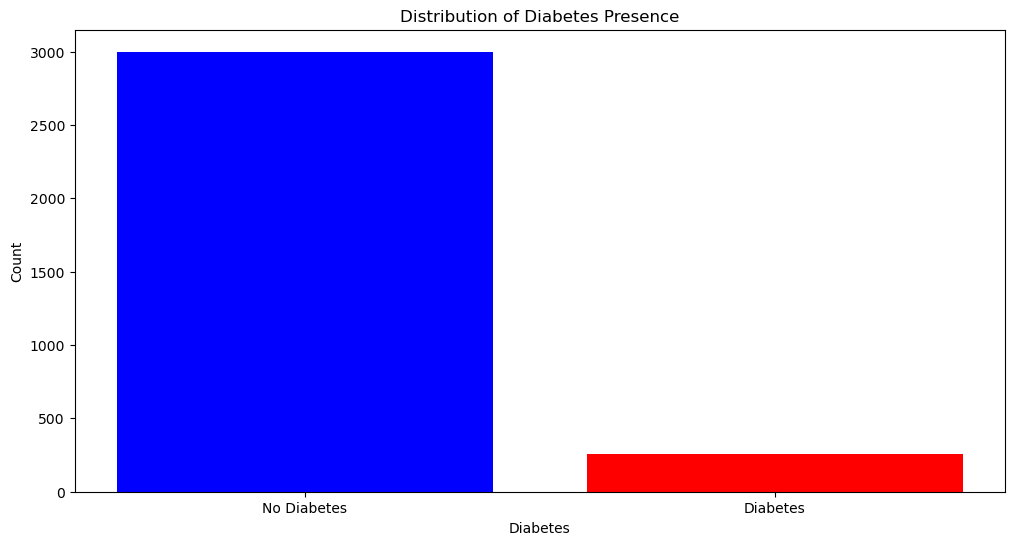

In [33]:
#Plotting visual for target variable

outcome_counts = diabetes_df['Diabetes'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xticks(outcome_counts.index, ['No Diabetes', 'Diabetes'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Presence')
plt.show()

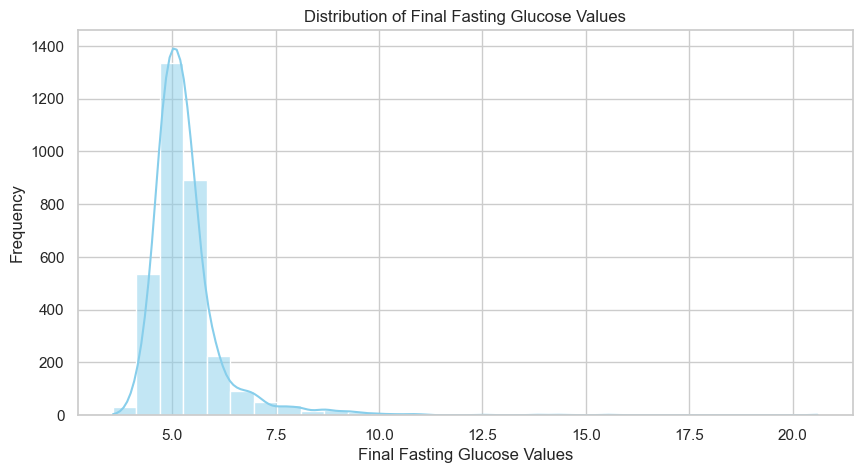

In [35]:
#Plotting a histogram to check the distribution of Final Fasting Glucose Values

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['Final Fasting Plasma Glucose'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Final Fasting Glucose Values')
plt.xlabel('Final Fasting Glucose Values')
plt.ylabel('Frequency')

plt.show()

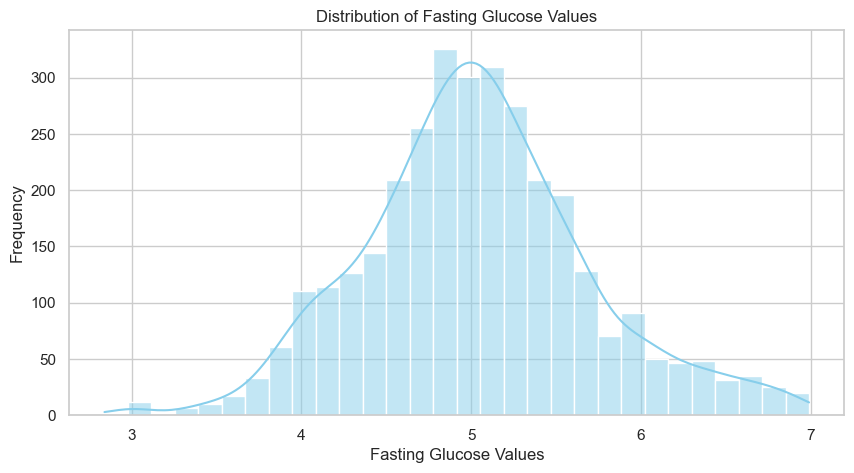

In [37]:
#Plotting a histogram to check the distribution of Fasting Plasma Glucose Values

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['Fasting Plasma Glucose'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Fasting Glucose Values')
plt.xlabel('Fasting Glucose Values')
plt.ylabel('Frequency')

plt.show()

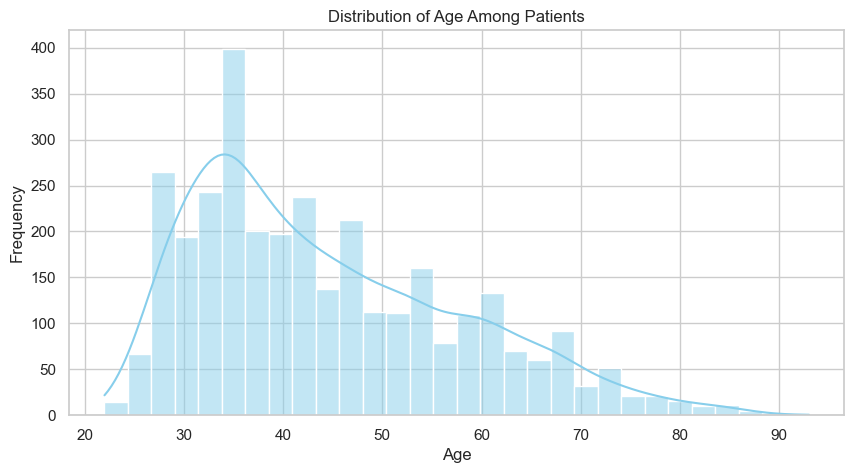

In [39]:
#Plotting a histogram to check the distribution of Age values

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['Age'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Age Among Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

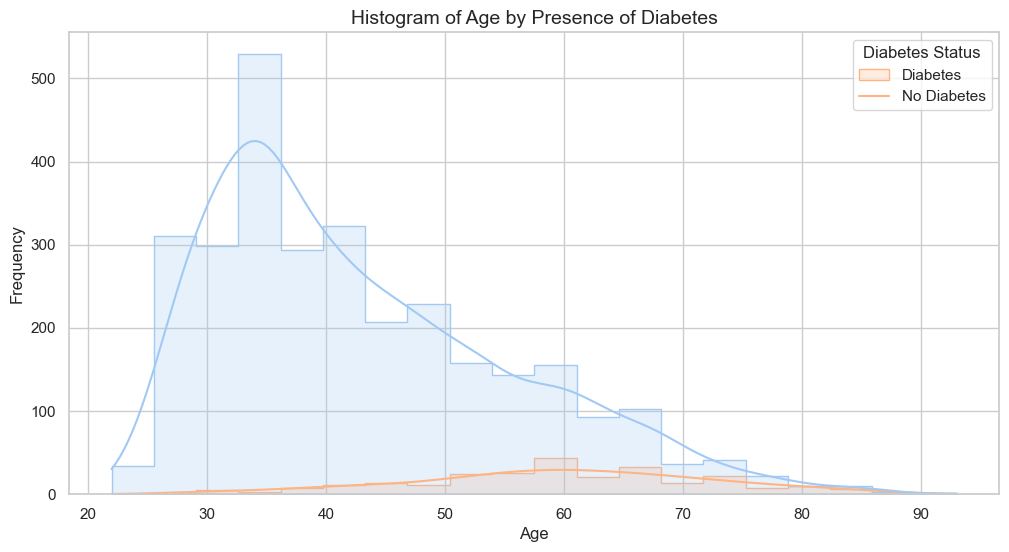

In [41]:
#Histogram of age distribution and presence of diabetes
plt.figure(figsize=(12, 6))
sns.histplot(data=diabetes_df, x='Age', hue='Diabetes', kde=True, bins=20, element='step', common_norm=False)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Age by Presence of Diabetes', fontsize=14)
plt.legend(title='Diabetes Status', labels=['Diabetes', 'No Diabetes'])
plt.show()

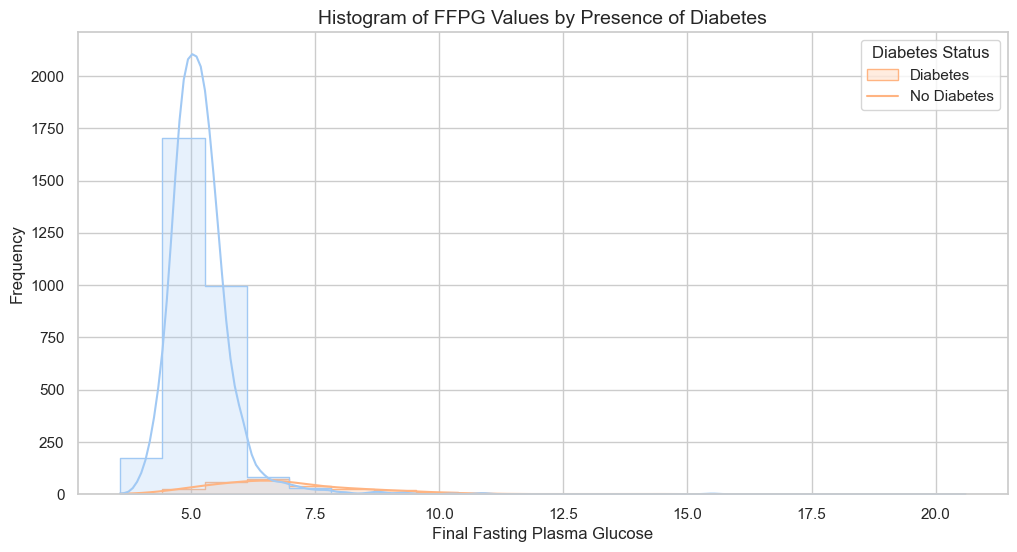

In [43]:
#Histogram of FFPG distribution and presence of diabetes
plt.figure(figsize=(12, 6))
sns.histplot(data=diabetes_df, x='Final Fasting Plasma Glucose', hue='Diabetes', kde=True, bins=20, element='step', common_norm=False)
plt.xlabel('Final Fasting Plasma Glucose', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of FFPG Values by Presence of Diabetes', fontsize=14)
plt.legend(title='Diabetes Status', labels=['Diabetes', 'No Diabetes'])
plt.show()

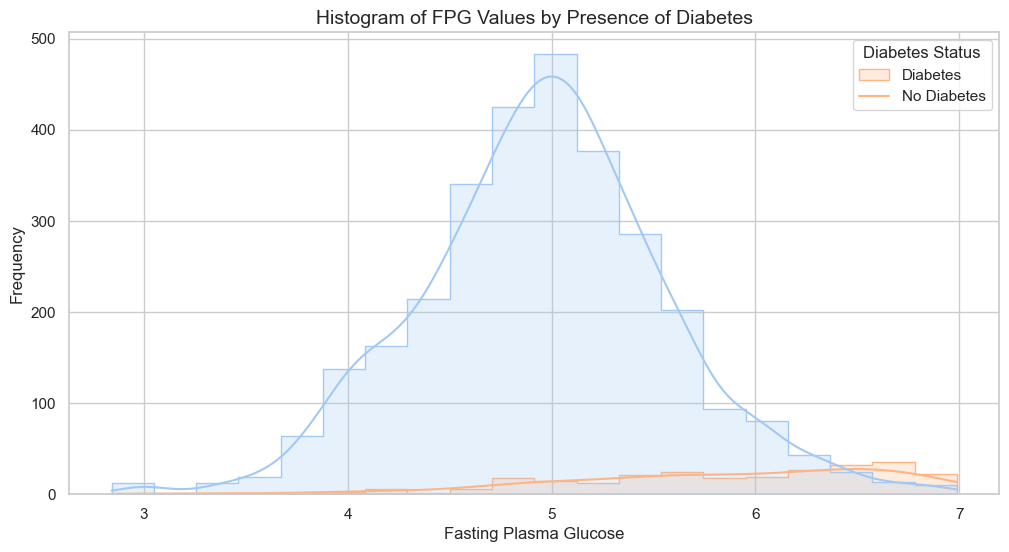

In [45]:
#Histogram of FPG distribution and presence of diabetes
plt.figure(figsize=(12, 6))
sns.histplot(data=diabetes_df, x='Fasting Plasma Glucose', hue='Diabetes', kde=True, bins=20, element='step', common_norm=False)
plt.xlabel('Fasting Plasma Glucose', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of FPG Values by Presence of Diabetes', fontsize=14)
plt.legend(title='Diabetes Status', labels=['Diabetes', 'No Diabetes'])
plt.show()

Looking at the distribution of the target variable, it appears that in individuals without diabetes, the majority of are between the ages of 30-40 years old. With individuals that do have diabetes, the highest amount tend to range around the ages of 55-65 years old. 

Regarding final fasting plasma glucose values (FFPG), in individuals without diabetes, the majority of have values around 5, a little below and a little above 5. With individuals that do have diabetes, the majority have values between ~ 5.75 to 7 and a few also have much higher values. 

With fasting plasma glucose values (FPG), in individuals without diabetes, the majority of have values around 4.5-5.5. With individuals that do have diabetes, the majority have values between 6 to 7 as this distribution seems to be skewed to the left. 

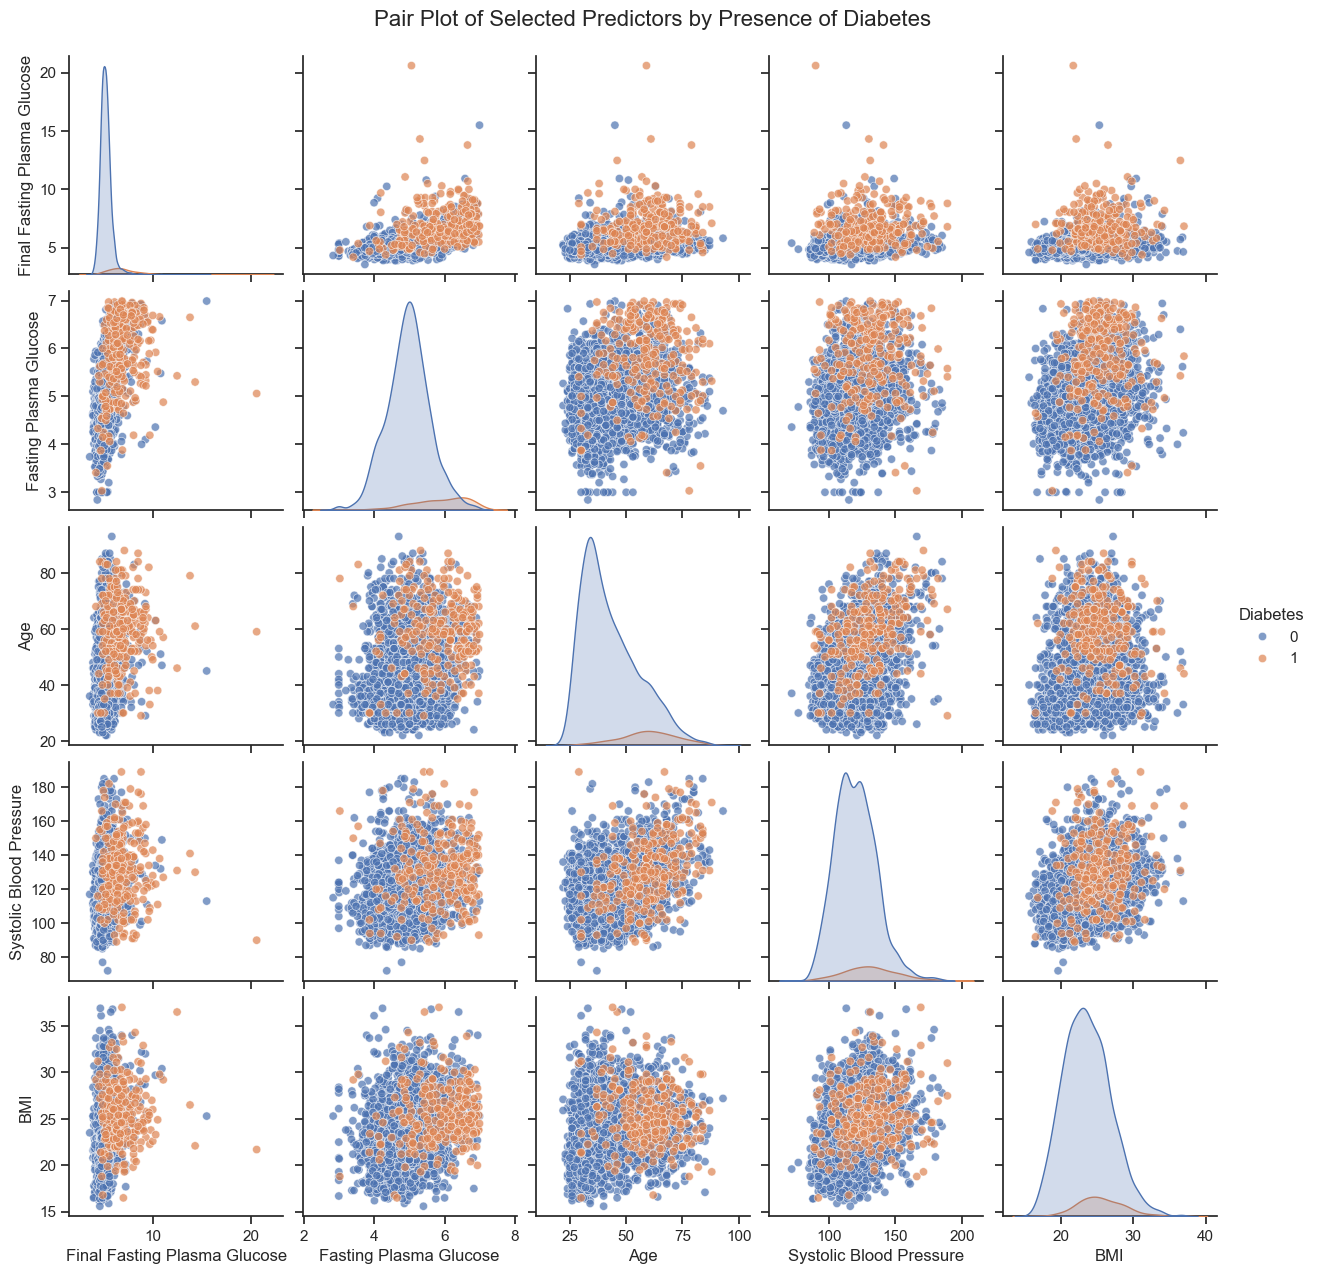

In [47]:
# Generating pairplot with selected top 5 highest correlated features

selected_predictors = ['Final Fasting Plasma Glucose', 'Fasting Plasma Glucose', 'Age', 'Systolic Blood Pressure', 'BMI']
sns.set(style="ticks")
sns.pairplot(diabetes_df, hue='Diabetes', vars=selected_predictors, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Selected Predictors by Presence of Diabetes', fontsize=16, y=1.02)
plt.show()

## Modeling

### Baseline Model 
#### Logistic Regession 

In [51]:
#Separating target variable from predictors
y = diabetes_df['Diabetes']
X = diabetes_df.drop('Diabetes', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Using Smote to address class imbalance with target variable 
sm = SMOTE(random_state = 42)
X_train_resample,y_train_resample = sm.fit_resample(X_train, y_train)

# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()

,Age,Gender,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Fasting Plasma Glucose,Cholesterol,Triglycerides,HDL,LDL,ALT,BUN,Creatine Clearance,Final Fasting Plasma Glucose,Smoking,Drinking,Family_History
0,-1.522525,-0.549462,-1.561411,-0.343112,-0.332056,0.349661,-0.854471,-1.217890,0.874522,-0.459422,0.252890,-0.037086,-0.223996,-0.915046,0.743048,-1.898506,-0.201703
1,1.172144,1.819962,0.787608,1.238810,-0.044830,-0.247068,0.056584,7.285785,-0.988945,-2.517268,-0.297362,-0.298561,0.461228,-0.720768,0.743048,0.487673,-0.201703
2,-1.107961,-0.549462,-1.808676,-1.755543,-0.332056,-2.050228,-0.747984,-0.038348,-0.777987,-0.671259,-0.837876,0.011941,1.079925,-0.432949,-0.461421,-1.898506,-0.201703
3,-0.278832,-0.549462,1.096689,0.334855,0.242397,0.479384,1.535571,0.930888,0.769043,1.734604,0.048372,0.289758,0.195122,-0.303430,-1.665889,-1.898506,-0.201703
4,-1.315243,1.819962,-1.406870,-1.416559,-1.193736,-0.169234,-1.872014,-1.181316,0.382285,-1.639657,-0.784311,-0.772484,-1.042272,-1.015783,0.743048,0.487673,-0.201703


In [52]:
#Instantiate the model 
baseline_model = LogisticRegression(random_state = 42)

# Fit the model to the data
baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_pred= baseline_model.predict(X_test_scaled)

# Baseline test score 
baseline_score = baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
baseline_train_score = baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
baseline_cv = cross_val_score(baseline_model, X_train_scaled, y_train_resample)


print("Baseline Training Score:", baseline_train_score)
print("Baseline Test Score:", baseline_score)
print("Cross Validation Scores:", baseline_cv)


# Classification report for confusion matrix 
baseline_report = classification_report(y_test, y_base_pred)
print(baseline_report)

Baseline Training Score: 0.8984895601954687
Baseline Test Score: 0.9030674846625767
Cross Validation Scores: [0.86792453 0.90344062 0.89777778 0.89777778 0.90666667]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       749
           1       0.45      0.83      0.58        66

    accuracy                           0.90       815
   macro avg       0.72      0.87      0.76       815
weighted avg       0.94      0.90      0.92       815



In [53]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("Model's Test Score:", test_score)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

In [54]:
# Generating baseline model scores 
model_scores(baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.8984895601954687
Model's Test Score: 0.9030674846625767
Cross Validation Scores: [0.86792453 0.90344062 0.89777778 0.89777778 0.90666667]
Model's Accuracy Score: 0.9030674846625767
Model's Precision Score: 0.44715447154471544
Model's F1 Score: 0.582010582010582
Model's Recall Score: 0.8333333333333334


#### Baseline Model Evaluation

The initial baseline model was a simple Logistic Regression model used to predict the target variable, presence of Diabetes, based on the the independent variables/ features, various lifestyle and health metrics.

Metrics used to assess the model included:
- Accuracy: 0.9030674846625767
- Precision: 0.44715447154471544
- F1 Score: 0.5820105820105821
- Recall: 0.8333333333333334

Cross-Validation was also performed:
- Cross Validation Scores: 0.86792453, 0.90344062, 0.89777778, 0.89777778, 0.90555556


One thing to note about the metrics is that while all metrics give us an idea of how the model performs, certain ones will be more valuable to focus on depending on the business problem and stakeholder. While I will be generating all of these metrics for each model, I will be focusing more so on recall and F1 score as evaluation metrics. As a preventive/treatment measure, I find that having a higher recall in this case is more warranted. Then looking at F1 Score, since this is a combination of both recall and precision, this will aid with evaluating the model from an overall perspective. With diabetes being a gateway disease, early treatment and lifestyle intervention would increase chances for positive outcomes. 

Regarding recall, since recall is the score of the # of true positives over the number of actual positives, this would increase chances of correctly identifying the individuals with higher risk/chance of Diabetes. Recall does have its limitations in that there may be an increase in number of false positives, however in the case of the disease of Diabetes, I want to lean more towards correctly overly identifying risk than to underidentify. Depending on the intervention, alot of lifestyle and health improvement interventions geared towards Diabetes would generally not be hamrful or detrimental to those who may be a false positive and labeled as higher risk of Diabetes. 

Looking at the F1 Score, this takes into account both the recall score and the precision score to give a well-rounded score of how the model is performing. So if F1 is higher, then generally the model is doing better all around. 

So looking at the baseline model, the recall score was 0.83. Having a recall of 0.833 means that out of all the patients who actually had Diabetes, the model was able to correctly identify 83.3% of them. 

Regarding the baseline model, we can also look at both the training and test scores. At baseline both of these scores are on the higher end showing good performance. Both test and training scores are very close in values indicating that the model is performing about the same on both the training set and the test set. From these scores, it can assumed that the model is not showing signs of underfitting or overfitting. 

- Model's Train Score: 0.8984895601954687
- Model's Test Score: 0.9030674846625767



### Decision Tree Classifier Model 

In [58]:
# Decision tree model classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier 
dt_classifier.fit(X_train_scaled, y_train_resample)

# Make predictions for test data
y_tree_pred = dt_classifier.predict(X_test_scaled)

# Scoring on trained data
dt_train_score = dt_classifier.score(X_train_scaled, y_train_resample)

# Scoring on test data
dt_test_score = dt_classifier.score(X_test_scaled, y_test)

# Cross validating model
dt_cv = cross_val_score(dt_classifier, X_train_scaled, y_train_resample)


print("Decision Tree Training Score:", dt_train_score)
print("Decision Tree  Test Score:", dt_test_score)
print("Cross Validation Scores:", dt_cv)


# Classification report 
dt_report = classification_report(y_test, y_tree_pred)
print(dt_report)

Decision Tree Training Score: 1.0
Decision Tree  Test Score: 0.8858895705521472
Cross Validation Scores: [0.8845727  0.91897891 0.92555556 0.91333333 0.92666667]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       749
           1       0.35      0.50      0.42        66

    accuracy                           0.89       815
   macro avg       0.65      0.71      0.68       815
weighted avg       0.91      0.89      0.89       815



In [59]:
# Checking classification metrics
model_scores(dt_classifier, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 1.0
Model's Test Score: 0.8858895705521472
Cross Validation Scores: [0.8845727  0.91897891 0.92555556 0.91333333 0.92666667]
Model's Accuracy Score: 0.8858895705521472
Model's Precision Score: 0.3548387096774194
Model's F1 Score: 0.41509433962264153
Model's Recall Score: 0.5


#### Decision Tree Model Evaluation

The second model was a simple Decision Tree Classifier model. The model's performance metrics were: 

- Accuracy: 0.8858895705521472
- Precision: 0.3548387096774194
- F1 Score: 0.41509433962264153
- Recall:  0.5
- Cross Validation Scores: 0.8845727,  0.91897891, 0.92555556, 0.91333333, 0.92666667

Looking at the metrics, this model performed worse in each metric compared to the baseline model. Recall and F1 were much lower on this model compared to the baseline model. Accuracy was only slightly lower. 

Looking at the training and test scores, the model performed better on training set than on the test set indicating that the model is slightly overfitting. 

- Train Score: 1.0
- Test Score: 0.8858895705521472

### K-Nearest Neighbors Model 

In [63]:
# Instantiate KNN Model 
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train_resample)
knn_y_pred = knn.predict(X_test_scaled)

# Knn Train Model Score
knn_train_score = knn.score(X_train_scaled, y_train_resample)

# Knn Test Model Score
knn_test_score = knn.score(X_test_scaled, y_test)


# Cross validating model
knn_cv = cross_val_score(knn, X_train_scaled, y_train_resample)


print("KNN Training Score:", knn_train_score)
print("KNN Test Score:", knn_test_score)
print("Cross Validation Scores:", knn_cv)


# Classification report 
knn_report = classification_report(y_test, knn_y_pred)
print(knn_report)

KNN Training Score: 0.9482452243447357
KNN Test Score: 0.849079754601227
Cross Validation Scores: [0.93673696 0.93007769 0.92444444 0.93111111 0.91777778]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       749
           1       0.31      0.70      0.43        66

    accuracy                           0.85       815
   macro avg       0.64      0.78      0.67       815
weighted avg       0.92      0.85      0.87       815



In [64]:
# Checking classification metrics
model_scores(knn, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.9482452243447357
Model's Test Score: 0.849079754601227
Cross Validation Scores: [0.93673696 0.93007769 0.92444444 0.93111111 0.91777778]
Model's Accuracy Score: 0.849079754601227
Model's Precision Score: 0.3087248322147651
Model's F1 Score: 0.42790697674418604
Model's Recall Score: 0.696969696969697


#### KNN Model Evaluation

The third model was a K-Nearest Neighbors model. The model's performance metrics were:

- Accuracy Score: 0.849079754601227
- Precision Score: 0.3087248322147651
- F1 Score: 0.42790697674418604
- Recall Score: 0.696969696969697
- Cross Validation Scores: 0.93673696, 0.93007769, 0.92444444, 0.93111111, 0.91777778

Looking at the metrics, this model performed worse in accuracy and precision compared to the baseline and decision tree model. Recall was lower on this model compared to the baseline model but higher than the decision tree model. F1 score was lowered compared to baseline model and only barely higher than the decision tree model. 

Looking at the training and test scores, the model performed better on training set than on the test set indicating that the model is slightly overfitting.

- Train Score: 0.9482452243447357
- Test Score: 0.849079754601227

### Random Forest Classifier Model

In [68]:
# Random forest classifier model

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train_resample)

# Getting test predictions
y_rfc_pred = rfc.predict(X_test_scaled)

# Random Forest Train Model Score
rfc_train_score = rfc.score(X_train_scaled, y_train_resample)

# Random Forest Test Model Score
rfc_test_score = rfc.score(X_test_scaled, y_test)

# Cross validating model
rfc_cv = cross_val_score(rfc, X_train_scaled, y_train_resample)


print("Random Forest Training Score:", rfc_train_score)
print("Random Forest Test Score:", rfc_test_score)
print("Cross Validation Scores:", rfc_cv)

# Classification report 
rfc_report = classification_report(y_test, y_rfc_pred)
print(rfc_report)

Random Forest Training Score: 1.0
Random Forest Test Score: 0.9239263803680982
Cross Validation Scores: [0.9445061  0.96226415 0.96       0.96222222 0.96555556]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       749
           1       0.53      0.62      0.57        66

    accuracy                           0.92       815
   macro avg       0.75      0.79      0.76       815
weighted avg       0.93      0.92      0.93       815



In [69]:
# Checking classification metrics
model_scores(rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 1.0
Model's Test Score: 0.9239263803680982
Cross Validation Scores: [0.9445061  0.96226415 0.96       0.96222222 0.96555556]
Model's Accuracy Score: 0.9239263803680982
Model's Precision Score: 0.5256410256410257
Model's F1 Score: 0.5694444444444444
Model's Recall Score: 0.6212121212121212


#### Random Forest Model Evaluation

The fourth model was a Random Forest model. The model's performance metrics were:

- Accuracy Score: 0.9239263803680982
- Precision Score: 0.5256410256410257
- F1 Score: 0.5694444444444445
- Recall Score: 0.6212121212121212
- Cross Validation Scores: 0.94339623, 0.96337403, 0.95888889, 0.96222222, 0.96555556


Looking at the metrics, this model has has the highest accuracy score and highest precision score of all the models so far. Recall was lower on this model compared to baseline and knn models but higher than the decision tree model. F1 score was slightly lower compared to baseline model but higher than the rest of the other models.

Looking at the training and test scores, the model performed better on training set than on the test set indicating that the model is slightly overfitting.

- Train Score: 1.0
- Test Score: 0.9239263803680982

### Model Metrics 

In [73]:
models = [baseline_model, dt_classifier, knn, rfc]
for model in models:
    print(model)
    print("")
    model_scores(model, X_train_scaled, X_test_scaled, y_train_resample, y_test)
    print("")

LogisticRegression(random_state=42)

Model's Train Score: 0.8984895601954687
Model's Test Score: 0.9030674846625767
Cross Validation Scores: [0.86792453 0.90344062 0.89777778 0.89777778 0.90666667]
Model's Accuracy Score: 0.9030674846625767
Model's Precision Score: 0.44715447154471544
Model's F1 Score: 0.582010582010582
Model's Recall Score: 0.8333333333333334

DecisionTreeClassifier(random_state=42)

Model's Train Score: 1.0
Model's Test Score: 0.8858895705521472
Cross Validation Scores: [0.8845727  0.91897891 0.92555556 0.91333333 0.92666667]
Model's Accuracy Score: 0.8858895705521472
Model's Precision Score: 0.3548387096774194
Model's F1 Score: 0.41509433962264153
Model's Recall Score: 0.5

KNeighborsClassifier()

Model's Train Score: 0.9482452243447357
Model's Test Score: 0.849079754601227
Cross Validation Scores: [0.93673696 0.93007769 0.92444444 0.93111111 0.91777778]
Model's Accuracy Score: 0.849079754601227
Model's Precision Score: 0.3087248322147651
Model's F1 Score: 0.4279069

### Best Performing Model

Highest Accuracy score: 
- Random Forest Classifier: 0.9239263803680982

Highest Precision score: 
- Random Forest Classifier: 0.5256410256410257

Highest F1 score: 
- Baseline Logistic Regression: 0.5820105820105821

Highest Recall score: 
- Baseline Logistic Regression: 0.8333333333333334

Looking at the identified metrics focus stated earlier, Recall and F1, it seems the baseline model performed best in these metrics. The baseline model will be the model to proceed with for further iterations and tuning. 

## Hyperparameter Tuning

### Baseline Model Tuning

In [77]:
# Utilizing GridSearch to find best combination of parameters
# Define hyperparameter grid, looking at regularization strength, regularization type and solver options
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [1, 2, 3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(baseline_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search.fit(X_train_scaled, y_train_resample) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_log_reg = grid_search.best_estimator_

# Using tuned model for predictions
y_grid_pred = best_log_reg.predict(X_test_scaled) 


Best Hyperparameters:  {'C': 1, 'max_iter': 5, 'penalty': 'l2', 'solver': 'sag'}
Best Score:  0.8960503144654087


In [78]:
#Instantiate the model with tuned hyperparameters
tuned_baseline_model = LogisticRegression(random_state = 42, C = 1, penalty = 'l2',
                                          solver = 'sag', max_iter = 5 )

# Fit the model to the data
tb_model = tuned_baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_tuned_pred= tuned_baseline_model.predict(X_test_scaled)

# Baseline test score 
tuned_baseline_score = tuned_baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
tuned_baseline_train_score = tuned_baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_baseline_cv = cross_val_score(tuned_baseline_model, X_train_scaled, y_train_resample)


print("Tuned Baseline Training Score:", tuned_baseline_train_score)
print("Tuned Baseline Test Score:", tuned_baseline_score)
print("Tuned Cross Validation Scores:", tuned_baseline_cv)


Tuned Baseline Training Score: 0.8978231896934695
Tuned Baseline Test Score: 0.9042944785276074
Tuned Cross Validation Scores: [0.86792453 0.90566038 0.90222222 0.90111111 0.90333333]


In [79]:
# Classification metrics for tuned baseline model
model_scores(tuned_baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.8978231896934695
Model's Test Score: 0.9042944785276074
Cross Validation Scores: [0.86792453 0.90566038 0.90222222 0.90111111 0.90333333]
Model's Accuracy Score: 0.9042944785276074
Model's Precision Score: 0.45081967213114754
Model's F1 Score: 0.5851063829787234
Model's Recall Score: 0.8333333333333334


In [80]:
# Classification metrics for baseline model
model_scores(baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.8984895601954687
Model's Test Score: 0.9030674846625767
Cross Validation Scores: [0.86792453 0.90344062 0.89777778 0.89777778 0.90666667]
Model's Accuracy Score: 0.9030674846625767
Model's Precision Score: 0.44715447154471544
Model's F1 Score: 0.582010582010582
Model's Recall Score: 0.8333333333333334


After tuning the baseline logistic regression model, overall model performance increased very slightly. There was a slight decrease in the train score but a slight increase in the test score. Recall score stayed the same while both F1 and precision slightly improved. With recall staying the same and F1 showing slight improvement, this model does perform slightly better. 

### Random Forest Tuning

In [83]:
# Utilizing GridSearch to find best combination of parameters for the Random Forest Model

param_grid = {
    'n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples  
}

# Create a GridSearchCV object
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
rfc_grid_search.fit(X_train_scaled, y_train_resample) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", rfc_grid_search.best_params_)
print("Best Score: ", rfc_grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_rfc = rfc_grid_search.best_estimator_

# Using tuned model for predictions
y_rfc_grid_pred = best_rfc.predict(X_test_scaled)  


Best Hyperparameters:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
Best Score:  0.9480276236280675


In [84]:
#Instantiate the model with tuned hyperparameters
tuned_rfc = RandomForestClassifier(random_state = 42, bootstrap = False, max_depth = 10, 
                                   min_samples_leaf = 1, min_samples_split = 2, n_estimators = 5)

# Fit the model to the data
tuned_rfc.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_rfc_tuned_pred= tuned_rfc.predict(X_test_scaled)

# Tuned test score 
tuned_rfc_test_score = tuned_rfc.score(X_test_scaled, y_test)

# Tuned train score 
tuned_rfc_train_score = tuned_rfc.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_rfc_cv = cross_val_score(tuned_rfc, X_train_scaled, y_train_resample)


print("Tuned Random Forest Training Score:", tuned_rfc_train_score)
print("Tuned Random Forest Test Score:", tuned_rfc_test_score)
print("Tuned Random Forest Cross Validation Scores:", tuned_rfc_cv)

Tuned Random Forest Training Score: 0.9844513549533541
Tuned Random Forest Test Score: 0.898159509202454
Tuned Random Forest Cross Validation Scores: [0.92674806 0.94894562 0.95333333 0.95333333 0.95777778]


In [85]:
# Classification metrics for best rfc model
model_scores(tuned_rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.9844513549533541
Model's Test Score: 0.898159509202454
Cross Validation Scores: [0.92674806 0.94894562 0.95333333 0.95333333 0.95777778]
Model's Accuracy Score: 0.898159509202454
Model's Precision Score: 0.4158415841584158
Model's F1 Score: 0.5029940119760479
Model's Recall Score: 0.6363636363636364


In [86]:
# Checking classification for initial rfc metrics
model_scores(rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 1.0
Model's Test Score: 0.9239263803680982
Cross Validation Scores: [0.9445061  0.96226415 0.96       0.96222222 0.96555556]
Model's Accuracy Score: 0.9239263803680982
Model's Precision Score: 0.5256410256410257
Model's F1 Score: 0.5694444444444444
Model's Recall Score: 0.6212121212121212


After tuning the random forest model, overall model performance actually showed a decline. There was a decrease in accuracy, precision and F1, however there was a slight increase in recall. 

## Feature Importance and Confusion Matrix of Best Performing Model 

### Tuned Baseline Model Feature Importances

Final Fasting Plasma Glucose: 2.298323276830833
Age: 0.9224254721264985
Fasting Plasma Glucose: 0.6693194237116253
Cholesterol: 0.5813063110855319
LDL: 0.4731007586732563
Gender: 0.4482930073161404
Creatine Clearance: 0.42990663323667655
BMI: 0.3774724648973579
Triglycerides: 0.2893528447864234
HDL: 0.24529901532894172
Smoking: 0.21998928309657098
BUN: 0.21471282269990208
Drinking: 0.1641401339631104
Systolic Blood Pressure: 0.15318338721501817
Family_History: 0.14026175815622988
Diastolic Blood Pressure: 0.13380194543299812
ALT: 0.02397169015170411


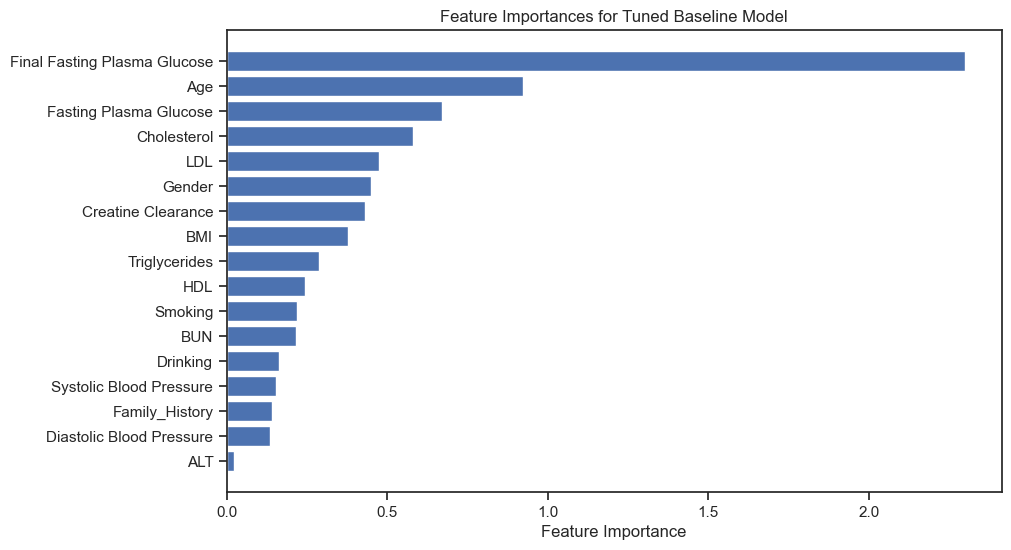

In [89]:
# Getting the coefficients (weights) of the features
coef = tuned_baseline_model.coef_[0]

# Calculating the feature importances by taking the absolute values of the coefficients
feature_importances = abs(coef)

# Getting the feature names 
feature_names = ["Age", "Gender", "BMI", "Systolic Blood Pressure", "Diastolic Blood Pressure", "Fasting Plasma Glucose", 
                 "Cholesterol", "Triglycerides", "HDL", "LDL", "ALT", "BUN", "Creatine Clearance", "Final Fasting Plasma Glucose", 
                 "Smoking", "Drinking", "Family_History"]

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 6))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Tuned Baseline Model')
plt.gca().invert_yaxis() 
plt.show()

    

With the tuned baseline model, the most important features that contribute the most to the model's predictions are FFPG, Age and FPG. This isn't surprising considering these were the top 3 features that had the highest correlation to the target variable (presence of diabetes). 

### Tuned Baseline Model Confusion Matrix

In [92]:
# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_base_tuned_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[682  67]
 [ 11  55]]


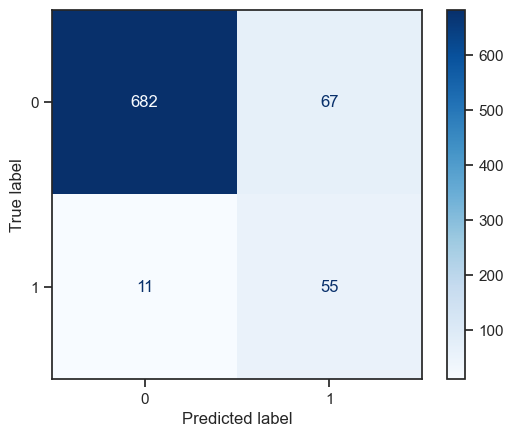

In [93]:
# Visualize confusion matrix
tbcf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=tb_model.classes_)
tbcf_disp.plot(cmap=plt.cm.Blues)

Looking at the confusion matrix, it can be broken down as followed:
- Bottom right value of 55 (True Positives): this indicates that the model correctly labeled 55 individuals with diabetes who actually had diabetes.  

- Top right value of 67 (False Positives): this indicates that the model incorrectly labeled 67 individuals with diabetes who actually did not have diabetes.  

- Bottom right values of 11 (False Negatives): this indicates the model incorrectly labeled 11 individuals as non-diabetic/ absent of diabetes, when in fact the individuals did have diabetes. 

- Top left value of 682 (True Negatives): this indicates that the model correctly labeled 682 individualas as non-diabetic who were actually non-diabetic/ absent of diabetes. 


## Evaluation

After tuning both the baseline model and random forest classifier model, and comparing all four models (baseline logistic, tuned baseline logistic, rfc, tuned rfc), the tuned baseline logistic regression model had the best performance by our standards (F1 and Recall scores).

With the tuned baseline model the scores were: 

- Train Score: 0.8978231896934695
- Test Score: 0.9042944785276074
- Cross Validation Scores: 0.86792453, 0.90566038, 0.90222222, 0.90111111, 0.90333333
- Accuracy (same as test) Score: 0.9042944785276074
- Precision Score: 0.45081967213114754
- F1 Score: 0.5851063829787234
- Recall Score: 0.8333333333333334


Most Important Features: 
- FFPG (Final Fasting Plasma Glucose)
- Age 
- FPG (Fasting Plasma Glucose) 


Train and test scores were very close in value indicating that there was not any signs of underfitting or overfitting with the model. While the test/accuracy score was not the best of all models, its score of 0.904 is still adequate. Having a score of 0.904 indicates that out of all the predictions the model made, 90.4 % were correct. This includes true positives (individuals with diabetes) and true negatives(individuals without diabetes). 

Recall: The model's overall recall score was 0.833 which means that out of all of the individuals/patients that actually had diabetes, the model correctly identified 83.3 % of those. 

Precision: The model's overall precision score was 0.451 which indicates that out of all the times that the model stated that an individual had diabetes (predicted positives), 45.1 % of those actually had diabetes (true positives)

F1 Score: The model's overall score was 0.585 which takes into account both of precision and recall. Generally if this value is higher, this indicated the model is doing well all around. Having a value of 0.585 is lower than desired. Given that the model is skewed mored towards recall and less towards precision, the F1 score penalizes the model in this case. 

Overall, the tuned baseline logisitc regression model was the best performing model by the chosen metrics (Recall and F1 scores) used to evaluate the model. While the random forest model did have higher F1, accuracy and precision scores, the baseline model's recall score was much higher and it's F1 and accuracy scores were only slightly lower. Being that recall score along with F1 score are the metrics that are being weighed more heavily for evaluation, the baseline logistic regression model is the ideal model to choose here because it performs better at correctly identifying positive individuals with diabetes. While this model is higher with recall and correctly identifying those with diabetes, there is the chance for more false positive results with this model due to the trade off of higher recall and lower precision. 

When looking into the features, the most important features for this model are FFPG, Age and FPG with the most important feature being FFPG (Final Fasting Plasma Glucose). With these being the biggest predictors for the model (for identifying diabetes), these health metrics should be consistent monitored and considered by health care practitioners when reviewing health care plans.

In the healthcare and preventative medicine setting, correctly identifying individuals who actually have the disease is imperative so that treatment can begin as early as possible. Early detection increases chances for better overall outcomes for the patients and reduces their healthcare costs while also decreasing the burden of care and costs on the healthcare system and the providers. 


## Conclusion/Recommendations

The tuned baseline logisitic regression model showed great performance in identifying those with diabetes based on the various features and health/lifestyles metrics. The model showed that out of all individuals with diabetes, it could correctly identify 83.3 % of those individuals. This can provide great benefit for healthcare practitioner's by increasing early detection and allowing for early treatment. By treating the disease early on, this can improve overall prognosis, improve patient outcomes by preventing accerleration of disease and negative health consequences while also decreasing the load on the healthcare system and the providers. 

Recommendations: 

- Healthcare providers should utilize this model as an additional tool when providing care to their patients. Along with other diagnostic criteria, this model should be implemented when reviewing overall patient health and when updating or creating their care plans. 


- While this model is not an official diagnostic tool for diabetes, this model can be utilized for early detecton and screening. Using this model, practitioner's could implement preventative health methods, such as dietary education or exercise recommendations, early on before disease progression. 


- Healthcare practitioner's should also utilize this model as early detection that warrants additional testing. If an individuals is flagged by the model, additional diagnostic testing can then be utilized to confirm disease status.


- In the context of identifying diabetes status and risk, healthcare practitioner's should focus on a patients FFPG, Age and FPG. 


## Limitations

While the model can be useful to predicting individuals with diabetes based on various health and lifestyles factors, the model is not perfect and does have it's limitations. 

- False positives: When individuals actually have diabetes, the model correctly identifies those indiviudals approximiately 83.3% of the time. With having a higher recall, there is an increased risk of mislabeling indiviudals without diabetes as having diabetes. While there is this increased chance, having an increased risk if in correclty identifying someone as having diabetes is a better trade off in this situation that incorrectly labeling someone as not having diabetes when they in fact do have diabetes. If someone is labeled as a false positive, recommending increased care or lifestyle interventions to address diabetes may be more of an annoyance or inconvenience to a healthy patient, however this outcome would be better than if a patient with diabetes is not identified and is left untreated allowing the disease to progress and health to deteriorate. 


- Sample size: When training the model on the dataset, the number of patients with diabetes was low. In the final dataset, patients with diabetes only accouted for roughly 7.98% of the sample. A larger sample could allow for better more thorough training of the model. 


- Features: While most features were health markers that can be deciphered based on healthy guidelines, some features did not provide additional information on how they were valued/ measured. This would make it difficult to determine how they would influence diabetes itself. 